# **Dog Breed Classification** 🐕

This notebook builds a multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub.

**1. Problem definition:** Try to identify the dog breed from a given image of a dog.

**2. Data:** The data is imported from Kaggle.
https://www.kaggle.com/c/dog-breed-identification/data

**3. Evaluation:** The evaluation is a DataFrame with prediction probabilities of the test dataset for each dog breed.
https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

**4. Features:**
* It is going to be used deep learning and transfer leaning because the data is unstructured.
* The training dataset has 10 000+ dog images and 120 unique labels.
* The test dataset has 10 000+ dog images and no labels.

**5. Modelling:** It is going to be used a pre-trained model imported from Kaggle and the model is built using Keras API.
https://www.kaggle.com/models

In [ ]:
# Unzip the uploaded data into Google Drive
#!unzip '/content/drive/MyDrive/data-ML/dog-breed-identification.zip' -d '/content/drive/MyDrive/data-ML/'

## **Workspace ready**

In [13]:
# Import os module to interact with the operating system
import os

# Import EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import TensorFlow 2.x
import tensorflow as tf
print('TF version: ', tf.__version__)

# Import TensorFlow Hub
import tensorflow_hub as hub
print('TF HUB version: ', hub.__version__)

TF version:  2.15.0
TF HUB version:  0.16.1


In [ ]:
# Check GPU availability
if tf.config.list_physical_devices('GPU'):
  print('GPU available!')
else:
  print('GPU not available!')

GPU available!


## **Data analysis**

In [7]:
# Import the data
df = pd.read_csv('/content/drive/MyDrive/Data ML/Dog Breed/labels.csv')
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [9]:
# Describe the data
df.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


In [10]:
# Number of images per class
df['breed'].value_counts()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

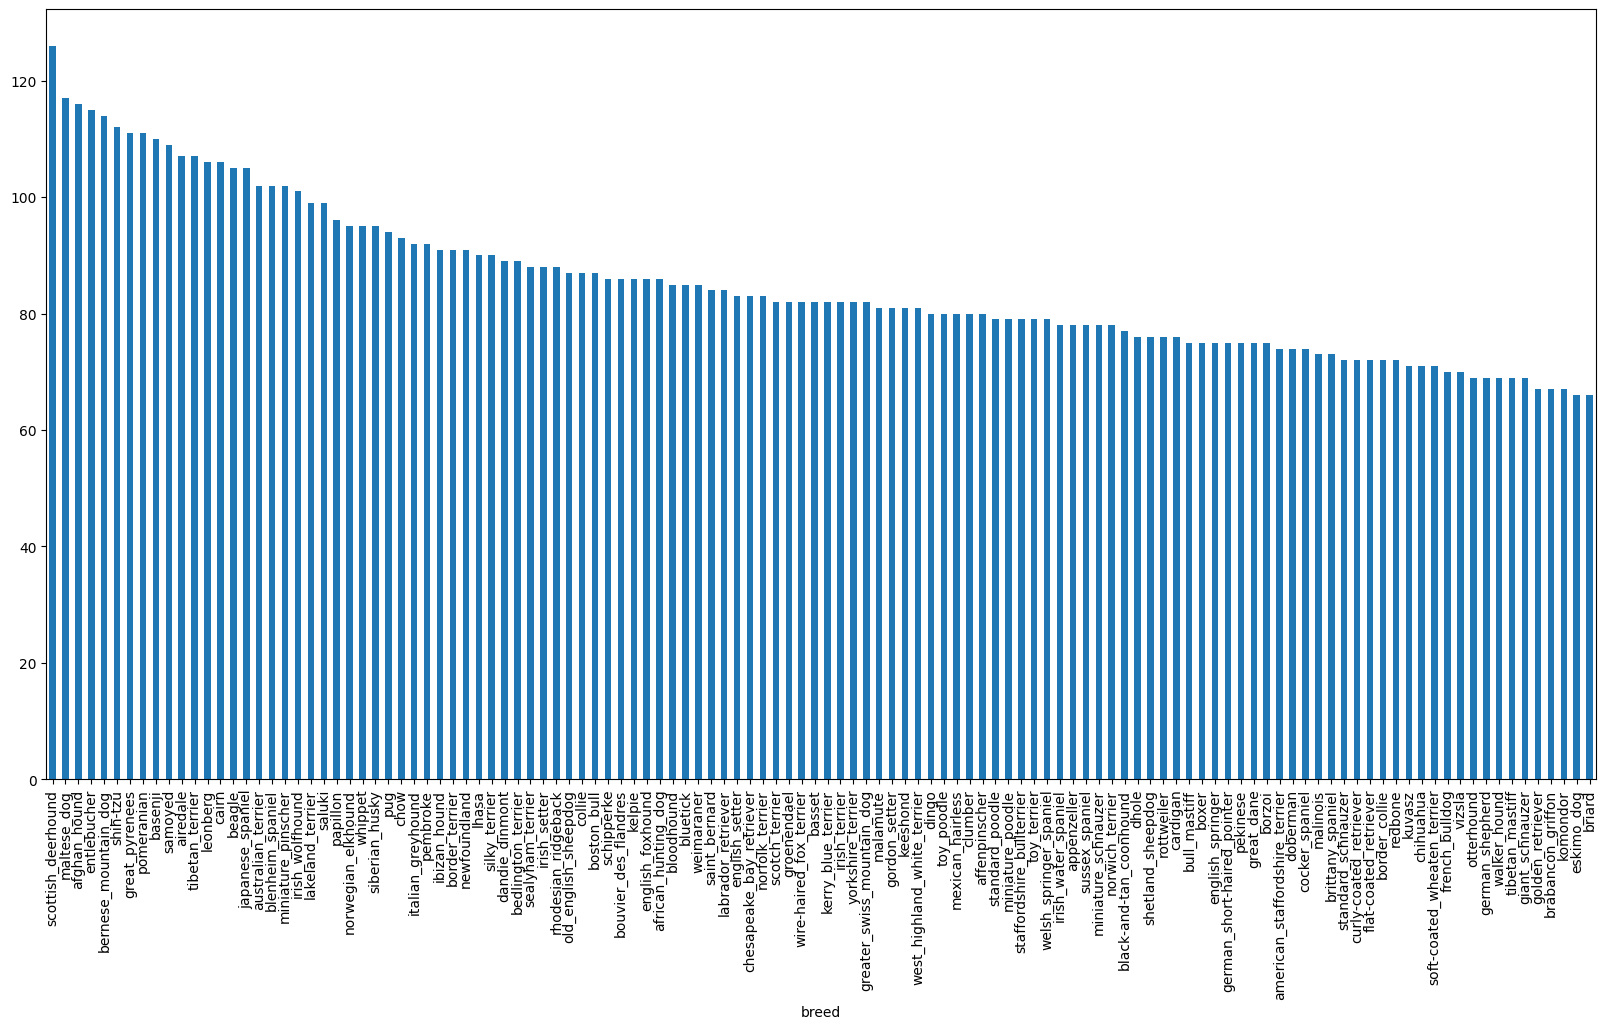

In [11]:
# Plot the number of images per class
df['breed'].value_counts().plot.bar(figsize=(20, 10));

After viewing, the data has:
* 10 222 total images
* 120 unique breeds
* `scottish_deerhound` is the most common breed, with 126 images


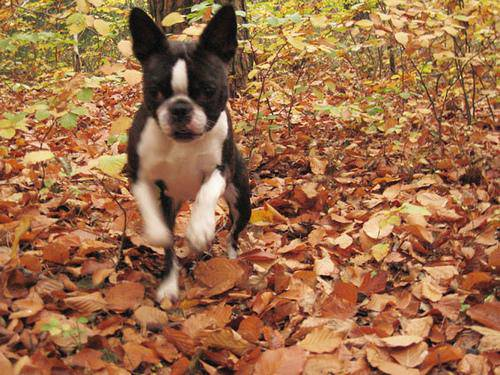

In [12]:
# View an image
from IPython.display import Image
Image('/content/drive/MyDrive/Data ML/Dog Breed/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

## **Missing data**
* Check if number of ids matches the the number of total images in the folder
* Check missing data in the DataFrame
* Find unique labels (120 dog breeds)
* Turn each label into a boolean array (it has value `1` if the `label` matches the `unique_label` and `0` for the rest of the array)

So, each image will have a filepath and a boolean array.

In [14]:
# Create a list of filenames paths
filenames = ['/content/drive/MyDrive/Data ML/Dog Breed/train/' + fname + '.jpg' for fname in df['id']]

# Check if number of filenames matches the number of actual image files in the folder
if len(os.listdir('/content/drive/MyDrive/Data ML/Dog Breed/train/')) == len(filenames):
  print('Filenames match actual amount of files!')
else:
  print('Files doesn\'t match actual amount of files!')

Filenames match actual amount of files!


In [15]:
filenames[:5]

['/content/drive/MyDrive/Data ML/Dog Breed/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Data ML/Dog Breed/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Data ML/Dog Breed/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Data ML/Dog Breed/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Data ML/Dog Breed/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [16]:
# Check missing data
if len(df['breed']) == len(filenames):
  print('NO missing data!')
else:
  print('Missing data!')

NO missing data!


In [17]:
# Turn labels into NumPy arrays
labels_np = df['breed'].to_numpy()
labels_np

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [19]:
# Find unique labels
unique_labels = np.unique(labels_np)
unique_labels

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [20]:
# Turn each label into a boolean array
boolean_labels = [label == unique_labels for label in labels_np]
boolean_labels[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

## **Training and validation datasets split**
The training (80%) and validation (20%) sets are splitted using `train_test_split()` function.

The test set is in a separated folder that will be imported later, after the model was built and trained.

**Steps to split the data:**
* Define X & y
  * X = contains the file paths
  * y = boolean arrays
* Define number of images to use for experimentation (training the model on full data it might takes a long time, so to make sure everything is working it will be used a subset of the data)
* Define `X_train`, `X_valid`, `y_train` & `y_valid` using `train_test_split()` function

In [21]:
# Create X & y
X = filenames
y = boolean_labels

In [22]:
# Set number of images to use for experimantation
NUM_IMAGES = 1000 #@param {type:'slider', min:1000, max:10000, step:100}

In [23]:
# Split into train & validation sets of total size NUM_IMAGES
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X[:NUM_IMAGES],
                                                      y[:NUM_IMAGES],
                                                      test_size=0.2,
                                                      random_state=12)

In [24]:
# Check length
len(X_train), len(X_valid), len(y_train), len(y_valid)

(800, 200, 800, 200)

### **Preprocess data (convert images into Tensors)**
Working with TensorFlow, the model can find patterns into images  if those are in numerical format (Tensors).

**Steps for turning images into Tensors:**
* Read an image filepath - `image`
* Turn `image` (.jpg file) into numerical Tensors with 3 color channels (Red, Green, Blue)
* Normalize `image` by converting the color channels from 0-255 values to 0-1 values
* Resize `image` to desired size (224 x 224)
* Return `image`

In [26]:
# Define image size
IMG_SIZE = 224

# Function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  '''
  Takes an image file path and turns the image into a Tensor.
  '''
  # Read an image file
  image = tf.io.read_file(image_path)

  # Turn the .jpg file into numerical Tensor with 3 color channels
  image = tf.image.decode_jpeg(image, channels=3)

  # Normalize the image
  image = tf.image.convert_image_dtype(image, tf.float32)

  # Resize the image
  image = tf.image.resize(image, size=[img_size, img_size])

  return image

### **Data into batches**
The training and validation dataset will be turned into batches because if the data is fitted all at one it might not fit into memory.

It's going to be used a batched of size 32.

Turning data into batches has some things differently depending on the type of data (if it is training data, validation data or test data):
* Training set - the data has labels and it will be shuffled
* Validation set - the data has labels and it will **not** be shuffled
* Test set - the data has **no** labels and it will **not** be shuffled

In [27]:
# Function to create Tensor tuples (image, label)
def tuple_img_label(image_path, label):
  '''
  Takes an image path and the associated label, processes
  the image and returns a tuple of (image, label).
  '''
  image = process_image(image_path)
  return image, label

In [39]:
# Function to turn tuple (image, label) into batches
BATCH_SIZE = 32

def create_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  '''
  Creates batches of data out of image (X) and label (y) pairs.
  If it's training data, shuffles the data.
  Also, accepts test data as input (y=None).
  '''
  # Test dataset (no labels)
  if test_data:
    print('Creating test data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)

  # Validations dataset
  elif valid_data:
    print('Creating validation data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data_batch = data.map(tuple_img_label).batch(BATCH_SIZE)

  # Training dataset
  else:
    print('Creating training data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data = data.shuffle(buffer_size=len(X))
    data_batch = data.map(tuple_img_label).batch(BATCH_SIZE)

  return data_batch

In [29]:
# Training and validation data batches
train_data = create_batches(X_train, y_train)
valid_data = create_batches(X_valid, y_valid, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [30]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [31]:
# Attributes of data batches
train_data.element_spec, valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

#### **Visualizing Data Batches**
To plot the images from a data batch, those images must be converted to NumPy arrays.


In [36]:
# Function for plotting images in a data batch
def plot_n_images(images, labels, n=5):
  '''
  Displays a plot of n images and their labels from a data batch.
  '''
  # Setup the figure
  plt.figure(figsize=(10, 10))

  # Loop through n (for displaying n images)
  for i in range(n):
    # Create subplots
    nc = 5 # number of columns
    nr = np.ceil(n/nc).astype(int) # number of rows, rounded up
    ax = plt.subplot(nr, nc, i+1) # (rows, columns, index)

    # Disply an image
    plt.imshow(images[i])

    # Add the image label as a title
    plt.title(unique_labels[labels[i].argmax()])

    # Turn the grid lines off
    plt.axis('off')

In [34]:
# Convert dataset to NumPy arrays
train_images, train_labels = next(train_data.as_numpy_iterator())
len(train_images), len(train_labels) # (32, 32)

(32, 32)

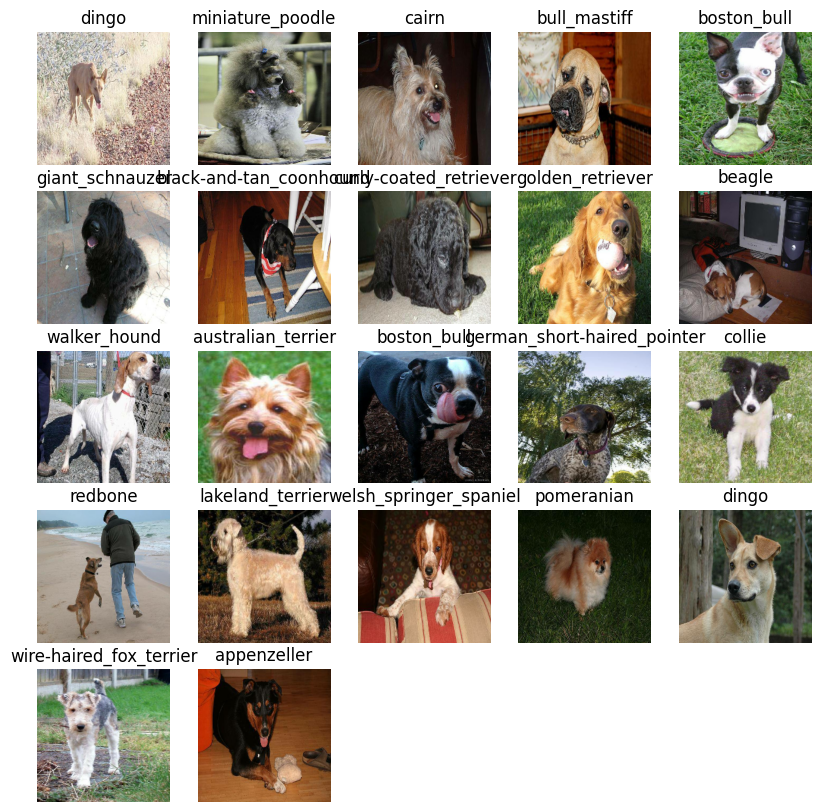

In [37]:
# Visualize the data in a training batch
plot_n_images(train_images, train_labels, 22)

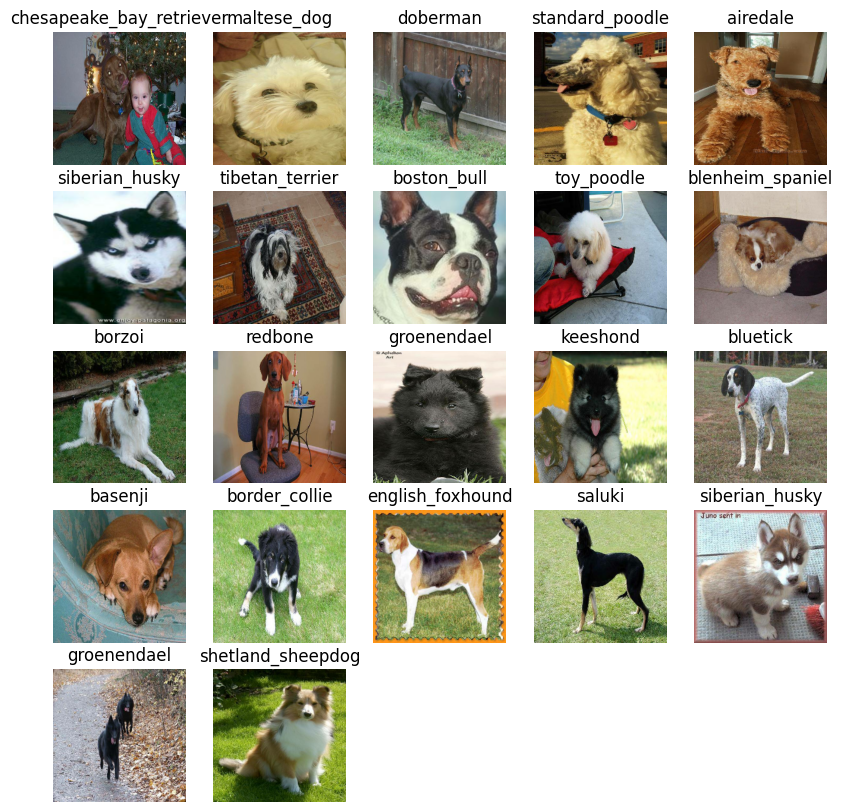

In [38]:
valid_images, valid_labels = next(valid_data.as_numpy_iterator())

# Visualize the data in a validation batch
plot_n_images(valid_images, valid_labels, 22)

## **Building a deep learning model**
Before creating a model, 3 things must be defined:
* input shape (shape of the images in Tensors format)
* the output shape (shape of labels in Tensors format)
* model's URL - https://www.kaggle.com/models/google/mobilenet-v2/tensorFlow2/140-224-classification

The model will be built using **Keras**.

In [40]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # [BATCH_SIZE, height, width, color_channels]

OUTPUT_SHAPE = len(unique_labels)

MODEL_URL = 'https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/140-224-classification/2'

In [41]:
# Function to build a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  '''
  Builds a sequential model and compile it using Keras API.
  '''
  print('Building model with:', MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation='softmax') # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [42]:
model = create_model()
model.summary()

Building model with: https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/140-224-classification/2
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              6158505   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 6278745 (23.95 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 6158505 (23.49 MB)
_________________________________________________________________


### **Callbacks**
Callbacks are functions that helps the model during training. The callbacks that will be created are:
* TensorBoard
* Early stopping

#### **TensorBoard Callback**
It helps saving logs to a specific directory.

**Steps to setup a TensorBoard callback:**
* Load the TensorBoard notebook extension
* Create a TensorBoard callback
* Visualize the model's training logs with the `%tensorboard` magic function
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard

In [43]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [44]:
import datetime

# Function to build TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join('/content/drive/MyDrive/Data ML/Dog Breed/logs',
                        # Make it so the logs get tracked whenever an expermiment is running
                        datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))

  return tf.keras.callbacks.TensorBoard(logdir)

#### **Early Stopping Callback**
It helps preventing overfitting by stoping the model if a certain evaluation metric stops improving.
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [46]:
# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=3)

## **Train the model** (on subset of data)
To make sure everything is working, the first model will be trained on a subset of data (`NUM_IMAGES = 1000`).

**Steps to train a model:**
* Create a model using `create_model()` function
* Create new TensorBoard callback session every time the model is trained using `create_tensorboard_callback()`
* Call the `fit()` function on the created model, passing it the training data batch, validation data batch, number of epochs (`NUM_EPOCHS`) and the callbacks
* Return the model

In [47]:
NUM_EPOCHS = 10 # @param {type:'slider', min:10, max:100, step:10}

In [ ]:
# Check GPU availability
if tf.config.list_physical_devices('GPU'):
  print('GPU available!')
else:
  print('GPU not available!')

GPU available!


In [48]:
# Function to train a model
def train_model():
  '''
  Trains a given model and returns the trained version.
  '''
  # Create a model
  model = create_model()

  # Setup a TensorBoard callback using `create_tensorboard_callback()`
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=valid_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])

  # Return the fitted model
  return model

In [ ]:
# Train the model using the function created
model = train_model()

Building model with: https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/140-224-classification/2
Epoch 1/10
25/25 [==============================] - 295s 12s/step - loss: 4.6424 - accuracy: 0.0962 - val_loss: 3.3480 - val_accuracy: 0.3200
Epoch 2/10
25/25 [==============================] - 4s 170ms/step - loss: 1.7213 - accuracy: 0.6800 - val_loss: 2.0394 - val_accuracy: 0.5650
Epoch 3/10
25/25 [==============================] - 5s 201ms/step - loss: 0.5852 - accuracy: 0.9413 - val_loss: 1.5893 - val_accuracy: 0.6500
Epoch 4/10
25/25 [==============================] - 4s 148ms/step - loss: 0.2470 - accuracy: 0.9950 - val_loss: 1.4023 - val_accuracy: 0.6850
Epoch 5/10
25/25 [==============================] - 4s 148ms/step - loss: 0.1444 - accuracy: 1.0000 - val_loss: 1.3312 - val_accuracy: 0.6950
Epoch 6/10
25/25 [==============================] - 4s 176ms/step - loss: 0.0973 - accuracy: 1.0000 - val_loss: 1.2968 - val_accuracy: 0.6850
Epoch 7/10
25/25 [======================

#### **Checking the TensorBoard logs**
Through TensorBoard magic function (`%tensorboard`), the logs directory is accessed and TensorBoard creates some plots to visualize and compare multiple logs sessions.

In [ ]:
%tensorboard --logdir /content/drive/MyDrive/Data\ ML/Dog\ Breed/logs

## **Making and evaluating predictions using a trained model**
The prediction probabilities are made using `predict()` function.

In [ ]:
# Make predictions on the validation data
predictions = model.predict(valid_data, verbose=1)
predictions

In [ ]:
predictions.shape # (200, 120) / (y_valid, unique_labels)

In [ ]:
predictions[0] # an array of 120 numbers

In [ ]:
np.sum(predictions[0])

In [ ]:
# First prediction
index = 42
print(predictions[index])
print(f'Max value (probability of prediction / confidence value): {np.max(predictions[index])}')
print(f'Sum: {np.sum(predictions[index])}')
print(f'Max index: {np.argmax(predictions[index])}')
print(f'Predicted label: {unique_labels[np.argmax(predictions[index])]}')

In [ ]:
unique_labels[113]

### **Access the prediction label**
From an array of values of prediction probabilities, the highest values represent the predicted label.

In [ ]:
# Function to turn the highest probability into a label
def get_pred_label(prediction_probabilities):
  '''
  Turns an array of predictions probabilities into a label.
  '''
  return unique_labels[np.argmax(prediction_probabilities)]

In [ ]:
# Test the function created above
pred_label = get_pred_label(predictions[22])
pred_label

### **Access images and true labels**
The images and true labels of a dataset can be accessed if the data is unbatched.

In [ ]:
valid_data

In [49]:
# Function to unbatch a batched dataset
def unbatch_batched_data(data_batch):
  '''
  Takes a batched dataset of (image, label) Tensors and
  returns separate arrays of images and labels.
  '''
  images_unbatched = []
  labels_unbatched = []

  # Loop through unbatched data
  for image, label in data_batch.unbatch().as_numpy_iterator():
    images_unbatched.append(image)
    labels_unbatched.append(unique_labels[np.argmax(label)])

  return images_unbatched, labels_unbatched

In [ ]:
valid_images, valid_labels = unbatch_batched_data(valid_data)
valid_images[0], valid_labels[0]

In [ ]:
get_pred_label[valid_labels[0]], get_pred_label[predictions[0]] # (true label, predicted label)

### **Plot the predicted label probability and true label**
**Steps to create a function:**
* As parameters, takes an array of prediction probabilities, an array of truth labels, an array of images and an integer (sample n)
* Convert the prediction probabilities to a predicted label
* Plot on a figure the predicted label, its predicted probability, the true label and the target image
* Change the color of the title depending of the prediction's correctness

In [50]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  '''
  Views the prediction, true label and image of sample n.
  '''
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title (green-right, red-wrong)
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # Change plot title to be predicted label, probability of prediction and true label
  plt.title(f'{pred_label} {np.max(pred_prob)*100:.2f}% {true_label}', color=color)

In [ ]:
plot_pred(prediction_probabilities=predictions, labels=valid_labels, images=valid_images, n=22)

For a better view of the predictions, it helps to see top 5 highest prediction probabilities for each image.

**Steps to create a function:**
* As parameters, takes an input of prediction probabilities, true labels and an integer
* Get the prediction using `get_pred_label()` function
* Get the top 5:
  * Prediction probabilities indexes
  * Prediction probabilities values
  * Prediction labels
* Plot the top 5 prediction probability values and labels, coloring the true label green


In [ ]:
# Function to plot top 5 prediction probabilities
def plot_top_5_preds(prediction_probabilities, true_labels, n=1):
  '''
  PLots top 5 highest predictions along with the true label for sample n.
  '''
  pred_prob, true_label = prediction_probabilities[n], true_labels[n]

  # Predicted label
  pred_label = get_pred_label(pred_prob)

  # Top 5 indexes probabilities
  top_5_pred_indexes = pred_prob.argsort()[-5:][::-1] # gives the order of indexes

  # Top 5 values probabilities
  top_5_pred_values = pred_prob[top_5_pred_indexes]

  # Top 5 prediction labels
  top_5_pred_labels = unique_labels[top_5_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_5_pred_labels)),
                     top_5_pred_values,
                     color='grey')
  plt.xticks(np.arange(len(top_5_pred_labels)),
             labels=top_5_pred_labels,
             rotation=90)

  # Change color of true label
  if np.isin(true_label, top_5_pred_labels):
    if top_plot[np.argmax(top_5_pred_labels == true_label)]:
      top_plot[true_label].set_color('green')

In [ ]:
predictions[0]

In [ ]:
predictions[0].argsort[:5]

In [ ]:
predictions[predictions[0].argsort()[-5:][::-1]]

In [ ]:
predictions[predictions[0].argsort()[:5]]

In [ ]:
plot_top_5_preds(prediction_probabilities=predictions, true_labels=valid_labels, n=22)

In [ ]:
# Plot top 5 prediction probabilities for multiple images
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols

plt.figure(figsize=(10*num_cols, 5*num_rows))

# Loop through each image of the validation data
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1) # try 2*i
  plot_pred(prediction_probabilities=predictions,
            labels=valid_labels,
            images=valid_images,
            n=i+i_multiplier)

  plt.subplot(num_rows, 2*num_cols, 2*i+2) # try 2*i+1
  plot_top_5_preds(prediction_probabilities=predictions,
                   labels=valid_labels,
                   n=i+i_multiplier)

plt.tight_layout(h_pad=1.0)
plt.show()

### **Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def create_confusion_matrix(true_labels, prediction_probabilities)
  # Create confusion matrix
  conf_matrix = confusion_matrix(true_labels, prediction_probabilities)

  # Plot it using Seaborn
  fix, ax = plt.subplots(figsize=(15, 10))
  ax = sns.heatmap(conf_matrix,
                   annot=True,
                   cmap='winter')

In [ ]:
create_confusion_matrix(valid_labels, predictions)

## **Saving and reloading a trained model**

In [ ]:
# Function to save a model
def save_model(mode, suffix=None):
  '''
  Saves a given model in a models directory and appends a suffix (string).
  '''
  # Create a model directory pathname with current time
  modeldir = os.path.join('/content/drive/MyDrive/Data ML/Dog Breed/models',
                          datetime.datetimme.now().strftime('%Y%m%d-%h%m%s'))

  model_path = modeldir + '-' + suffix + '.h5' # .h5 - extension (type of file)

  print(f'Saving model to: {model_path}...')
  model.save(model_path)
  return model_path

In [ ]:
# Function to load a trained model
def load_model(model_path):
  '''
  Loads a saved model from a specified path.
  '''
  print(f'Loading saved model from: {model_path}')
  model.tf.keras.model.load_model(model.path,
                                  custom_objects={'kerassLayer':hub.KerasLayer})
  return model

  # tell keras that there is a irregular layer (a layer that hasn't seen before in the model)
  # tell keras that user si using a custom model
  # custom_objects={'kerassLayer':hub.KerasLayer})

In [ ]:
# Save the model trained on subset of data
save_model(model, suffix='1000-images-mobilenetv2-Adam')

In [ ]:
# Load a trained model
loaded_1000_image_model = load_model('/content/drive/MyDrive/Data ML/Dog Breed/models/20200205-03121580872363-1000-images-mobilenetv2-Adam.h5')

In [ ]:
# Evaluate the pre-saved model
# .evaluate() - quick function to evaluate the model
model.evaluate(valid_data)

In [ ]:
# Evaluate the loaded model
loaded_1000_image_model.evaluate(valid_data)

## **Train model on full data**
The steps to train the model on a full data are the same used to train the model on subset of data. The difference is that the time to fit it will be much longer and the predictions might be more accurate.

In [ ]:
# Create a data batch with the full data set
full_data = create_batches(X, y)
full_data

In [ ]:
# Create a model for full data
full_model = create_model()

In [ ]:
# Create full model callback
full_model_tensorboard = create_tensorboard_callback()

full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                             patience=3)

In [ ]:
# Fit the model to full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

In [ ]:
save_model(full_model, suffix='full-image-set-mobilenetv2-Adam')

In [ ]:
# Load in the full model
loaded_full_model = load_model('/content/drive/MyDrive/Data ML/Dog Breed/models/')

In [ ]:
len(X)

## **Making predictions on test dataset**
To make predictions on the test set, it will be accesed the directory with test images and change the format of those images to be in the same format as the trained data.

**Steps:**
* Get the test image filenames
* Convert the filenames to data batches using `data_to_batches()` and set the `test_data=True`
* Make predictions using `predict()`

In [ ]:
# Load test image filenames
test_path = '/content/drive/MyDrive/Data ML/Dog Breed/test/'
test_filenames = [test_path + fname + '.jpg' for fname in os.listdir(test_path)]
test_filenames[:10]

In [ ]:
len(test_filenames)

In [ ]:
# Create test data batch
test_data = create_batches(test_filenames, test_data=True)
test_data

In [ ]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

In [ ]:
# Save predictions (NumPy array) to csv file (for access later)
np.savetext('/content/drive/MyDrive/Data ML/Dog Breed/preds_array.csv', test_predictions, delimiter=',')

In [ ]:
# Load predictions (NumPy array) from csv file
test_predictions = np.loadtext('/content/drive/MyDrive/Data ML/Dog Breed/preds_array.csv', delimiter=',')

## **Preparing test dataset predictions for Kaggle**
Kaggle specify the evaluation submission for this problem.

The submission will contain a DataFrame with image's ID and prediction probabilities for each unique label.
https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

**Steps to get data into the specified format:**
* Create a pandas DataFrame with the columns (ID, each unique label) - total of 121 columns
* Add data to ID column by extracting the test image ID's from their filepaths
* Add data (the prediction probabilites) to unique label column.
* Export the DataFrame as a csv file to submit it to Kaggle

In [ ]:
list(unique_labels)

In [ ]:
# Create a Pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=['ID'] + list(unique_labels))
preds_df.head()

In [ ]:
# Append test image ID's to predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df['id'] = test_ids
preds_df.head()

In [ ]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_labels)] = test_predictions

In [ ]:
# Save the predictions DataFrame to csv file for submission to Kaggle
preds_df.to_csv('/content/drive/MyDrive/Data ML/Dog Breed/full_model_predictions_submission_1_mobilnetv2.csv',
                index=False)

## **Making predictions on personal images**
**Steps:**
* Get the filepaths of personal images.
* Turn the filepaths into batches using `data_to_batches()`.Since this images don't have labels, the parameter `test_data=True`
* Make predictions using `predict()` function
* Convert the prediction probabilities into predictions labels.
* Compare the predicted labels to the personal images.

In [ ]:
# Get personal image filepaths
personal_path = '/content/drive/MyDrive/Data ML/Dog Breed/my-dogs-images/'
personal_images_paths = [personal_path + fname for fname in os.listdir(personal_path)]
personal_images_paths

In [ ]:
# Turn personal images into batches datasets
personal_data = create_batches(personal_images_paths, test_data=True)
personal_data

In [ ]:
# Make predictions on personal data
personal_preds = loaded_full_model.predict(personal_data,
                                           verbose=1)
personal_preds

In [ ]:
# Get personal image prediction labels
personal_pred_labels = [plot_pred(personal_preds[i]) for i in range(len(personal_preds))]
personal_pred_labels

In [ ]:
# Get personal images (unbatch() function won't work since there aren't labels... maybe we could fix this later)
personal_images = []

# Loop through unbatched data
for image in personal_data.unbatch().as_numpy_iterator():
  personal_images.appen(image)

In [ ]:
# PLot personal images predictions
plt.figure(figsize=(10, 10))

for i, image in enumerate(personal_images):
  plt.subplots(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(personal_pred_labels[i])
  plt.imshow(image)